In [155]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
#Carga desde un archivo .csv sin indice
data= pd.read_excel('Gastos y costos 20-23.xlsx') 

# **AÑO 2020**

In [157]:
gastos_2020=pd.read_csv('Gastos_costos_2020.csv') 
gastos_2020

,Unnamed: 0,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO GASTO,IMPORTE,IVA,TOTAL MX
0,0,2020-01-01,39408,ARSI RENTA SA DE CV,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",MAQUINARIA,0.00,2248.28,2248.28
1,1,2020-01-01,0001010100750847116902,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,490.00,78.40,568.40
2,2,2020-01-01,0001010100752163714102,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,195.00,31.20,226.20
3,3,2020-01-01,3663,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,HONORARIOS CONTABLES,10694.25,1711.08,12405.33
4,4,2020-01-01,2849,ELECTROTERMICA NACIONAL SA DE CV,Pago,COMPRAS,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
3337,3337,2020-12-01,125834,SERVICIO QUINTANA SUR S.A DE C.V,32011 MAGNA,COMBUSTIBLE,129.79,20.21,150.00
3338,3338,2020-12-01,37652,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,PUBLICIDAD,2284.80,365.57,2650.37
3339,3339,2020-12-01,160,"SUPER Q, S. A. DE C. V.",REF VICTORIA GROSELLA 3 LT PET NR,ALIMENTOS,163.79,26.21,190.00
3340,3340,2020-12-01,634875,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00


In [158]:
# Seleccionar las columnas numéricas para el análisis
df_numeric_2020 = gastos_2020[['IMPORTE','IVA', 'TOTAL MX']]
df_numeric_2020

,IMPORTE,IVA,TOTAL MX
0,0.00,2248.28,2248.28
1,490.00,78.40,568.40
2,195.00,31.20,226.20
3,10694.25,1711.08,12405.33
4,0.00,0.00,0.00
...,...,...,...
3337,129.79,20.21,150.00
3338,2284.80,365.57,2650.37
3339,163.79,26.21,190.00
3340,0.00,0.00,0.00


<Figure size 1500x800 with 0 Axes>

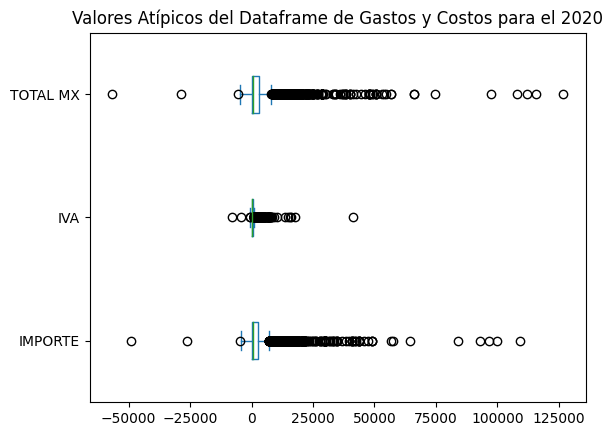

In [159]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_numeric_2020.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe de Gastos y Costos para el 2020")
plt.show() #dibujamos el diagrama

In [160]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df_numeric_2020
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido IMPORTE     25156.362379
IVA          4543.610743
TOTAL MX    28488.002843
dtype: float64
Limite inferior permitido IMPORTE    -18921.747418
IVA         -3587.332203
TOTAL MX   -21455.655297
dtype: float64


In [161]:
#Encontramos Ouliers del Dataframe
outliers= df_numeric_2020[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,IMPORTE,IVA,TOTAL MX
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
3337,NaN,NaN,NaN
3338,NaN,NaN,NaN
3339,NaN,NaN,NaN
3340,NaN,NaN,NaN


In [162]:
valores_nulos_O2020=outliers.isnull().sum()
valores_nulos_O2020

IMPORTE     3275
IVA         3283
TOTAL MX    3277
dtype: int64

In [163]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= df_numeric_2020[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,IMPORTE,IVA,TOTAL MX
0,0.00,2248.28,2248.28
1,490.00,78.40,568.40
2,195.00,31.20,226.20
3,10694.25,1711.08,12405.33
4,0.00,0.00,0.00
...,...,...,...
3337,129.79,20.21,150.00
3338,2284.80,365.57,2650.37
3339,163.79,26.21,190.00
3340,0.00,0.00,0.00


In [164]:
#Corroboramos valores nulos del dataframe3
valores_nulos=data3.isnull().sum()
valores_nulos

IMPORTE     67
IVA         59
TOTAL MX    65
dtype: int64

In [165]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,IMPORTE,IVA,TOTAL MX
0,0.00,2248.28,2248.28
1,490.00,78.40,568.40
2,195.00,31.20,226.20
3,10694.25,1711.08,12405.33
4,0.00,0.00,0.00
...,...,...,...
3337,129.79,20.21,150.00
3338,2284.80,365.57,2650.37
3339,163.79,26.21,190.00
3340,0.00,0.00,0.00


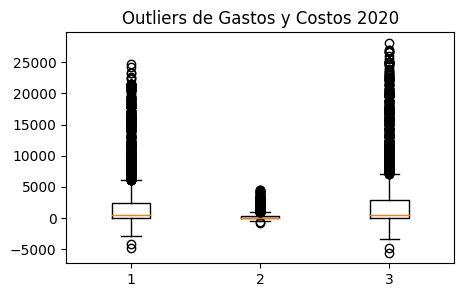

In [166]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean) 
plt.title("Outliers de Gastos y Costos 2020")
plt.show() #dibujamos el diagrama

In [167]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

IMPORTE     0
IVA         0
TOTAL MX    0
dtype: int64

In [168]:
cuali = gastos_2020[["FECHA", "FOLIO", "PROVEEDOR", "DESCRIPCION", "TIPO GASTO"]]
Datos_limpios_2020_1 = pd.concat([cuali, data_clean], axis=1)
Datos_limpios_2020_1

,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO GASTO,IMPORTE,IVA,TOTAL MX
0,2020-01-01,39408,ARSI RENTA SA DE CV,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",MAQUINARIA,0.00,2248.28,2248.28
1,2020-01-01,0001010100750847116902,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,490.00,78.40,568.40
2,2020-01-01,0001010100752163714102,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,195.00,31.20,226.20
3,2020-01-01,3663,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,HONORARIOS CONTABLES,10694.25,1711.08,12405.33
4,2020-01-01,2849,ELECTROTERMICA NACIONAL SA DE CV,Pago,COMPRAS,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,SERVICIO QUINTANA SUR S.A DE C.V,32011 MAGNA,COMBUSTIBLE,129.79,20.21,150.00
3338,2020-12-01,37652,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,PUBLICIDAD,2284.80,365.57,2650.37
3339,2020-12-01,160,"SUPER Q, S. A. DE C. V.",REF VICTORIA GROSELLA 3 LT PET NR,ALIMENTOS,163.79,26.21,190.00
3340,2020-12-01,634875,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00


In [169]:
# nulos en cuali
print(cuali.isnull().sum())

# nulos en data_clean
print(data_clean.isnull().sum())


FECHA          0
FOLIO          0
PROVEEDOR      0
DESCRIPCION    0
TIPO GASTO     0
dtype: int64
IMPORTE     0
IVA         0
TOTAL MX    0
dtype: int64


## **PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [170]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_numeric_2020

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido IMPORTE     6957.4850
IVA          965.5625
TOTAL MX    7983.1775
dtype: float64
Limite inferior permitido IMPORTE    -4174.4750
IVA         -579.3375
TOTAL MX   -4783.1425
dtype: float64


In [171]:
#Encontramos Outliers del Dataframe
outliers_iqr= df_numeric_2020[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,IMPORTE,IVA,TOTAL MX
0,NaN,2248.28,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,10694.25,1711.08,12405.33
4,NaN,NaN,NaN
...,...,...,...
3337,NaN,NaN,NaN
3338,NaN,NaN,NaN
3339,NaN,NaN,NaN
3340,NaN,NaN,NaN


In [172]:
#Obtenemos datos limpios del Dataframe
data3_iqr= df_numeric_2020[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,IMPORTE,IVA,TOTAL MX
0,0.00,NaN,2248.28
1,490.00,78.40,568.40
2,195.00,31.20,226.20
3,NaN,NaN,NaN
4,0.00,0.00,0.00
...,...,...,...
3337,129.79,20.21,150.00
3338,2284.80,365.57,2650.37
3339,163.79,26.21,190.00
3340,0.00,0.00,0.00


In [173]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

IMPORTE     423
IVA         445
TOTAL MX    420
dtype: int64

In [174]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,IMPORTE,IVA,TOTAL MX
0,0.00,144.90,2248.28
1,490.00,78.40,568.40
2,195.00,31.20,226.20
3,1078.30,144.90,1239.10
4,0.00,0.00,0.00
...,...,...,...
3337,129.79,20.21,150.00
3338,2284.80,365.57,2650.37
3339,163.79,26.21,190.00
3340,0.00,0.00,0.00


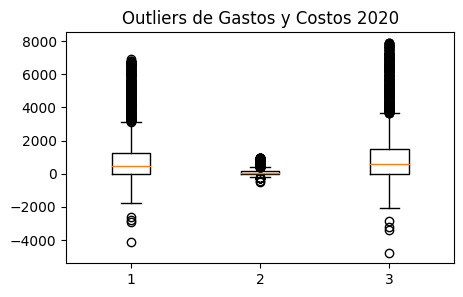

In [175]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data4_iqr) 
plt.title("Outliers de Gastos y Costos 2020")
plt.show() #dibujamos el diagrama

In [176]:
cuali = gastos_2020[["FECHA", "FOLIO", "PROVEEDOR", "DESCRIPCION", "TIPO GASTO"]]
Datos_limpios_2020_2 = pd.concat([cuali, data4_iqr], axis=1)
Datos_limpios_2020_2

,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO GASTO,IMPORTE,IVA,TOTAL MX
0,2020-01-01,39408,ARSI RENTA SA DE CV,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",MAQUINARIA,0.00,144.90,2248.28
1,2020-01-01,0001010100750847116902,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,490.00,78.40,568.40
2,2020-01-01,0001010100752163714102,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,195.00,31.20,226.20
3,2020-01-01,3663,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,HONORARIOS CONTABLES,1078.30,144.90,1239.10
4,2020-01-01,2849,ELECTROTERMICA NACIONAL SA DE CV,Pago,COMPRAS,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,SERVICIO QUINTANA SUR S.A DE C.V,32011 MAGNA,COMBUSTIBLE,129.79,20.21,150.00
3338,2020-12-01,37652,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,PUBLICIDAD,2284.80,365.57,2650.37
3339,2020-12-01,160,"SUPER Q, S. A. DE C. V.",REF VICTORIA GROSELLA 3 LT PET NR,ALIMENTOS,163.79,26.21,190.00
3340,2020-12-01,634875,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00


# **AÑO 2021**

In [177]:
gastos_2021=pd.read_csv('Gastos_costos_2021.csv') 
gastos_2021

,Unnamed: 0,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO GASTO,IMPORTE,IVA,TOTAL MX
0,0,2021-01-01,0001010100750847116902,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,490.00,78.40,568.40
1,1,2021-01-01,0001010100752163714102,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,345.00,55.20,400.20
2,2,2021-01-01,19788,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",MOTO E7 PLUS AZUL 64GB 4RAM,COMPRAS,3447.41,551.59,3999.00
3,3,2021-01-01,211781,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,ARRENDAMIENTO FINANCIERO,5551.38,888.22,6439.60
4,4,2021-01-01,211782,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.30
...,...,...,...,...,...,...,...,...,...
3030,3030,2021-12-01,127043,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",Pago,PUBLICIDAD,0.00,0.00,0.00
3031,3031,2021-12-01,11740,SPECTRIS MEXICO S DE RL DE CV,INSULATED T/C WIRE,COMPRAS,0.00,0.00,0.00
3032,3032,2021-12-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,22826.46,705.58,23532.04
3033,3033,2021-12-01,747826,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00


In [178]:
# Seleccionar las columnas numéricas para el análisis
df_numeric_2021 = gastos_2021[['IMPORTE','IVA', 'TOTAL MX']]
df_numeric_2021

,IMPORTE,IVA,TOTAL MX
0,490.00,78.40,568.40
1,345.00,55.20,400.20
2,3447.41,551.59,3999.00
3,5551.38,888.22,6439.60
4,5551.98,888.32,6440.30
...,...,...,...
3030,0.00,0.00,0.00
3031,0.00,0.00,0.00
3032,22826.46,705.58,23532.04
3033,0.00,0.00,0.00


<Figure size 1500x800 with 0 Axes>

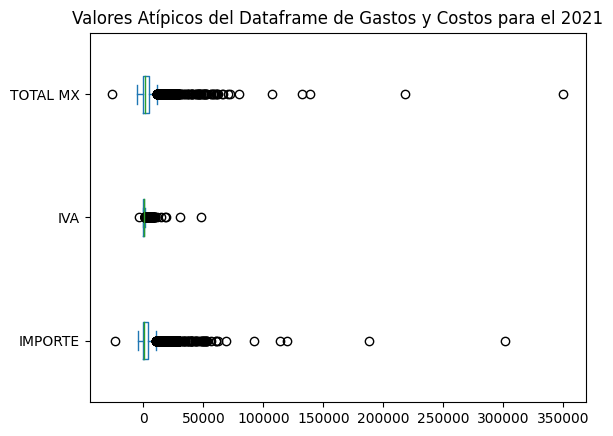

In [179]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_numeric_2021.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe de Gastos y Costos para el 2021")
plt.show() #dibujamos el diagrama

In [216]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df_numeric_2021
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido IMPORTE     36154.569820
IVA          5464.876801
TOTAL MX    40680.462408
dtype: float64
Limite inferior permitido IMPORTE    -27625.812771
IVA         -4276.811367
TOTAL MX   -31176.694132
dtype: float64


In [217]:
#Encontramos Ouliers del Dataframe
outliers1= df_numeric_2021[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers1

,IMPORTE,IVA,TOTAL MX
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
3030,NaN,NaN,NaN
3031,NaN,NaN,NaN
3032,NaN,NaN,NaN
3033,NaN,NaN,NaN


In [182]:
valores_nulos_O2021=outliers1.isnull().sum()
valores_nulos_O2021

IMPORTE     2976
IVA         2984
TOTAL MX    2978
dtype: int64

In [183]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3_21= df_numeric_2021[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3_21

,IMPORTE,IVA,TOTAL MX
0,490.00,78.40,568.40
1,345.00,55.20,400.20
2,3447.41,551.59,3999.00
3,5551.38,888.22,6439.60
4,5551.98,888.32,6440.30
...,...,...,...
3030,0.00,0.00,0.00
3031,0.00,0.00,0.00
3032,22826.46,705.58,23532.04
3033,0.00,0.00,0.00


In [184]:
#Corroboramos valores nulos del dataframe3
valores_nulos1=data3_21.isnull().sum()
valores_nulos1

IMPORTE     59
IVA         51
TOTAL MX    57
dtype: int64

In [185]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean1=data3_21.copy()
data_clean1=data_clean1.fillna(round(data3_21.mean(),1))
data_clean1

,IMPORTE,IVA,TOTAL MX
0,490.00,78.40,568.40
1,345.00,55.20,400.20
2,3447.41,551.59,3999.00
3,5551.38,888.22,6439.60
4,5551.98,888.32,6440.30
...,...,...,...
3030,0.00,0.00,0.00
3031,0.00,0.00,0.00
3032,22826.46,705.58,23532.04
3033,0.00,0.00,0.00


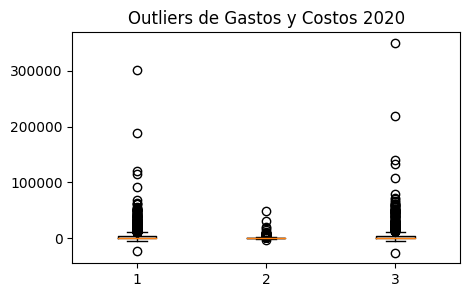

In [186]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean1) 
plt.title("Outliers de Gastos y Costos 2020")
plt.show() #dibujamos el diagrama

In [187]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos1=data_clean1.isnull().sum()
valores_nulos1

IMPORTE     0
IVA         0
TOTAL MX    0
dtype: int64

In [188]:
cuali21 = gastos_2021[["FECHA", "FOLIO", "PROVEEDOR", "DESCRIPCION", "TIPO GASTO"]]
Datos_limpios_2021_1 = pd.concat([cuali21, data_clean1], axis=1)
Datos_limpios_2021_1

,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO GASTO,IMPORTE,IVA,TOTAL MX
0,2021-01-01,0001010100750847116902,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,490.00,78.40,568.40
1,2021-01-01,0001010100752163714102,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,345.00,55.20,400.20
2,2021-01-01,19788,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",MOTO E7 PLUS AZUL 64GB 4RAM,COMPRAS,3447.41,551.59,3999.00
3,2021-01-01,211781,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,ARRENDAMIENTO FINANCIERO,5551.38,888.22,6439.60
4,2021-01-01,211782,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.30
...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",Pago,PUBLICIDAD,0.00,0.00,0.00
3031,2021-12-01,11740,SPECTRIS MEXICO S DE RL DE CV,INSULATED T/C WIRE,COMPRAS,0.00,0.00,0.00
3032,2021-12-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,22826.46,705.58,23532.04
3033,2021-12-01,747826,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00


## **PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [202]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_numeric_2021

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido IMPORTE     10127.7125
IVA          1381.4750
TOTAL MX    11580.2750
dtype: float64
Limite inferior permitido IMPORTE    -6076.6275
IVA         -828.8850
TOTAL MX   -6948.1650
dtype: float64


In [203]:
#Encontramos Outliers del Dataframe
outliers_iqr1= df_numeric_2021[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr1

,IMPORTE,IVA,TOTAL MX
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
3030,NaN,NaN,NaN
3031,NaN,NaN,NaN
3032,22826.46,NaN,23532.04
3033,NaN,NaN,NaN


In [204]:
#Obtenemos datos limpios del Dataframe
data3_iqr1= df_numeric_2021[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr1

,IMPORTE,IVA,TOTAL MX
0,490.00,78.40,568.4
1,345.00,55.20,400.2
2,3447.41,551.59,3999.0
3,5551.38,888.22,6439.6
4,5551.98,888.32,6440.3
...,...,...,...
3030,0.00,0.00,0.0
3031,0.00,0.00,0.0
3032,NaN,705.58,NaN
3033,0.00,0.00,0.0


In [205]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos1_1=data3_iqr1.isnull().sum()
valores_nulos1_1

IMPORTE     336
IVA         342
TOTAL MX    347
dtype: int64

In [206]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr1=data3_iqr1.copy()
data4_iqr1=data4_iqr1.fillna(round(data3_iqr1.mean(),1))
data4_iqr1

,IMPORTE,IVA,TOTAL MX
0,490.00,78.40,568.4
1,345.00,55.20,400.2
2,3447.41,551.59,3999.0
3,5551.38,888.22,6439.6
4,5551.98,888.32,6440.3
...,...,...,...
3030,0.00,0.00,0.0
3031,0.00,0.00,0.0
3032,1699.50,705.58,1903.4
3033,0.00,0.00,0.0


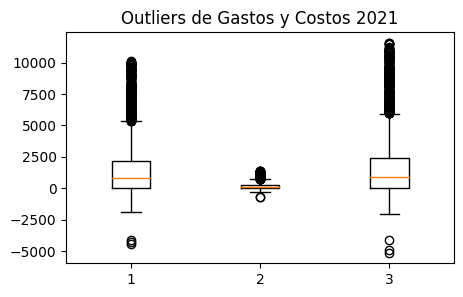

In [207]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data4_iqr1) 
plt.title("Outliers de Gastos y Costos 2021")
plt.show() #dibujamos el diagrama

In [209]:
cuali21 = gastos_2021[["FECHA", "FOLIO", "PROVEEDOR", "DESCRIPCION", "TIPO GASTO"]]
Datos_limpios_2021_2 = pd.concat([cuali21, data4_iqr1], axis=1)
Datos_limpios_2021_2

,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO GASTO,IMPORTE,IVA,TOTAL MX
0,2021-01-01,0001010100750847116902,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,490.00,78.40,568.4
1,2021-01-01,0001010100752163714102,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,345.00,55.20,400.2
2,2021-01-01,19788,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",MOTO E7 PLUS AZUL 64GB 4RAM,COMPRAS,3447.41,551.59,3999.0
3,2021-01-01,211781,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,ARRENDAMIENTO FINANCIERO,5551.38,888.22,6439.6
4,2021-01-01,211782,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.3
...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",Pago,PUBLICIDAD,0.00,0.00,0.0
3031,2021-12-01,11740,SPECTRIS MEXICO S DE RL DE CV,INSULATED T/C WIRE,COMPRAS,0.00,0.00,0.0
3032,2021-12-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,1699.50,705.58,1903.4
3033,2021-12-01,747826,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.0


# **AÑO 2022**

In [210]:
gastos_2022=pd.read_csv('Gastos_costos_2022.csv') 
gastos_2022

,Unnamed: 0,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO_GASTO,IMPORTE,IVA,TOTAL MX
0,4,2022-01-01,280109,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.30
1,5,2022-01-01,007817297284,"BANCO NACIONAL DE MEXICO, S.A.",Servicios de Facturación,COMISION BANCARIA,0.00,0.00,0.00
2,6,2022-01-01,5595,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.00
3,7,2022-01-01,5614,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.00
4,8,2022-01-01,42862,"AESA ARTICULOS ELECTRICOS, S.A. DE C.V.",Pago,COMPRAS,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2571,2575,2022-12-01,863376,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00
2572,2576,2022-12-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,17310.30,516.32,17826.62
2573,2577,2022-12-01,4,Aesa Articulos Electricos S.A de C.V,Pago,COMPRAS,0.00,0.00,0.00
2574,2578,2022-12-01,16,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.00


In [211]:
# Seleccionar las columnas numéricas para el análisis
df_numeric_2022 = gastos_2022[['IMPORTE','IVA', 'TOTAL MX']]
df_numeric_2022

,IMPORTE,IVA,TOTAL MX
0,5551.98,888.32,6440.30
1,0.00,0.00,0.00
2,0.00,0.00,0.00
3,0.00,0.00,0.00
4,0.00,0.00,0.00
...,...,...,...
2571,0.00,0.00,0.00
2572,17310.30,516.32,17826.62
2573,0.00,0.00,0.00
2574,0.00,0.00,0.00


<Figure size 1500x800 with 0 Axes>

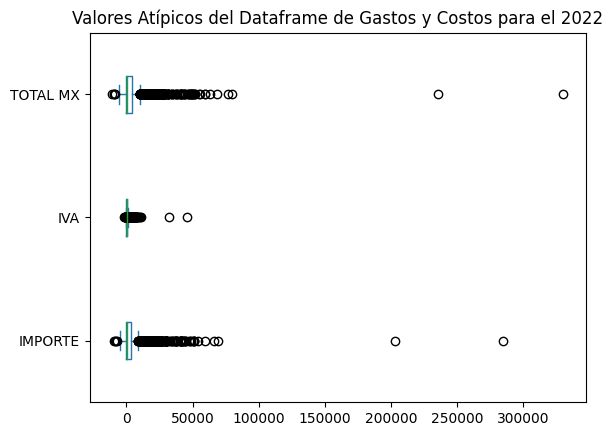

In [212]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_numeric_2022.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe de Gastos y Costos para el 2022")
plt.show() #dibujamos el diagrama

In [218]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df_numeric_2022
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido IMPORTE     34980.774426
IVA          5049.315411
TOTAL MX    39059.822268
dtype: float64
Limite inferior permitido IMPORTE    -26996.925197
IVA         -4070.798745
TOTAL MX   -30254.834066
dtype: float64


In [219]:
#Encontramos Ouliers del Dataframe
outliers_22= df_numeric_2022[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_22

,IMPORTE,IVA,TOTAL MX
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2571,NaN,NaN,NaN
2572,NaN,NaN,NaN
2573,NaN,NaN,NaN
2574,NaN,NaN,NaN


In [220]:
valores_nulos_O2022=outliers_22.isnull().sum()
valores_nulos_O2022

IMPORTE     2540
IVA         2545
TOTAL MX    2540
dtype: int64

In [221]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3_22= df_numeric_2022[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3_22

,IMPORTE,IVA,TOTAL MX
0,5551.98,888.32,6440.30
1,0.00,0.00,0.00
2,0.00,0.00,0.00
3,0.00,0.00,0.00
4,0.00,0.00,0.00
...,...,...,...
2571,0.00,0.00,0.00
2572,17310.30,516.32,17826.62
2573,0.00,0.00,0.00
2574,0.00,0.00,0.00


In [223]:
#Corroboramos valores nulos del dataframe3
valores_nulos_22=data3_22.isnull().sum()
valores_nulos_22

IMPORTE     36
IVA         31
TOTAL MX    36
dtype: int64

In [224]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean22=data3_22.copy()
data_clean22=data_clean22.fillna(round(data3_22.mean(),1))
data_clean22

,IMPORTE,IVA,TOTAL MX
0,5551.98,888.32,6440.30
1,0.00,0.00,0.00
2,0.00,0.00,0.00
3,0.00,0.00,0.00
4,0.00,0.00,0.00
...,...,...,...
2571,0.00,0.00,0.00
2572,17310.30,516.32,17826.62
2573,0.00,0.00,0.00
2574,0.00,0.00,0.00


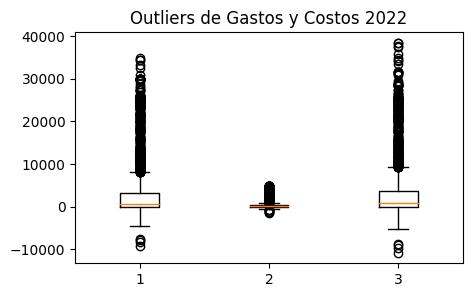

In [225]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean22) 
plt.title("Outliers de Gastos y Costos 2022")
plt.show() #dibujamos el diagrama

In [226]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos_22=data_clean22.isnull().sum()
valores_nulos_22

IMPORTE     0
IVA         0
TOTAL MX    0
dtype: int64

In [228]:
cuali = gastos_2022[["FECHA", "FOLIO", "PROVEEDOR", "DESCRIPCION", "TIPO_GASTO"]]
Datos_limpios_2022_1 = pd.concat([cuali, data_clean22], axis=1)
Datos_limpios_2022_1

,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO_GASTO,IMPORTE,IVA,TOTAL MX
0,2022-01-01,280109,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.30
1,2022-01-01,007817297284,"BANCO NACIONAL DE MEXICO, S.A.",Servicios de Facturación,COMISION BANCARIA,0.00,0.00,0.00
2,2022-01-01,5595,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.00
3,2022-01-01,5614,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.00
4,2022-01-01,42862,"AESA ARTICULOS ELECTRICOS, S.A. DE C.V.",Pago,COMPRAS,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
2571,2022-12-01,863376,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00
2572,2022-12-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,17310.30,516.32,17826.62
2573,2022-12-01,4,Aesa Articulos Electricos S.A de C.V,Pago,COMPRAS,0.00,0.00,0.00
2574,2022-12-01,16,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.00


## **PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [229]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_numeric_2022

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido IMPORTE      9014.725
IVA          1031.150
TOTAL MX    10299.925
dtype: float64
Limite inferior permitido IMPORTE    -5408.835
IVA         -618.690
TOTAL MX   -6179.955
dtype: float64


In [230]:
#Encontramos Outliers del Dataframe
outliers_iqr22= df_numeric_2022[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr22

,IMPORTE,IVA,TOTAL MX
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2571,NaN,NaN,NaN
2572,17310.3,NaN,17826.62
2573,NaN,NaN,NaN
2574,NaN,NaN,NaN


In [231]:
#Obtenemos datos limpios del Dataframe
data3_iqr22= df_numeric_2022[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr22

,IMPORTE,IVA,TOTAL MX
0,5551.98,888.32,6440.3
1,0.00,0.00,0.0
2,0.00,0.00,0.0
3,0.00,0.00,0.0
4,0.00,0.00,0.0
...,...,...,...
2571,0.00,0.00,0.0
2572,NaN,516.32,NaN
2573,0.00,0.00,0.0
2574,0.00,0.00,0.0


In [232]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos_2022=data3_iqr22.isnull().sum()
valores_nulos_2022

IMPORTE     307
IVA         303
TOTAL MX    304
dtype: int64

In [233]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr22=data3_iqr22.copy()
data4_iqr22=data4_iqr22.fillna(round(data3_iqr22.mean(),1))
data4_iqr22

,IMPORTE,IVA,TOTAL MX
0,5551.98,888.32,6440.3
1,0.00,0.00,0.0
2,0.00,0.00,0.0
3,0.00,0.00,0.0
4,0.00,0.00,0.0
...,...,...,...
2571,0.00,0.00,0.0
2572,1440.70,516.32,1660.0
2573,0.00,0.00,0.0
2574,0.00,0.00,0.0


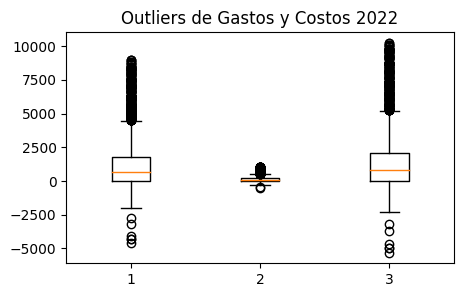

In [234]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data4_iqr22) 
plt.title("Outliers de Gastos y Costos 2022")
plt.show() #dibujamos el diagrama

In [236]:
cuali = gastos_2022[["FECHA", "FOLIO", "PROVEEDOR", "DESCRIPCION", "TIPO_GASTO"]]
Datos_limpios_2022_2 = pd.concat([cuali, data4_iqr22], axis=1)
Datos_limpios_2022_2

,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO_GASTO,IMPORTE,IVA,TOTAL MX
0,2022-01-01,280109,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.3
1,2022-01-01,007817297284,"BANCO NACIONAL DE MEXICO, S.A.",Servicios de Facturación,COMISION BANCARIA,0.00,0.00,0.0
2,2022-01-01,5595,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.0
3,2022-01-01,5614,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.0
4,2022-01-01,42862,"AESA ARTICULOS ELECTRICOS, S.A. DE C.V.",Pago,COMPRAS,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
2571,2022-12-01,863376,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.0
2572,2022-12-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,1440.70,516.32,1660.0
2573,2022-12-01,4,Aesa Articulos Electricos S.A de C.V,Pago,COMPRAS,0.00,0.00,0.0
2574,2022-12-01,16,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.0


# **AÑO 2023**

In [237]:
gastos_2023=pd.read_csv('Gastos_costos_2023.csv') 
gastos_2023

,Unnamed: 0,Fecha,Folio,Proveedor,Descripción,TIPO GASTO,Importe,IVA,TOTAL MX
0,0,2023-01-01,31,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.00
1,1,2023-01-01,38,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.00
2,2,2023-01-01,341932,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.38,888.22,6439.60
3,3,2023-01-01,341933,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.30
4,4,2023-01-01,342205,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,ARRENDAMIENTO FINANCIERO,8454.37,1352.70,9807.07
...,...,...,...,...,...,...,...,...,...
392,392,2023-02-01,882974,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00
393,393,2023-02-01,053560,BEBIDAS PURIFICADAS,Epura 20 Lts Policarbonato,ALIMENTOS,220.00,0.00,220.00
394,394,2023-02-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,18071.52,682.40,18753.92
395,395,2023-02-01,1453820,EFECTIVALE S. de R.L. de C.V.,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,GASOLINA,14472.32,0.00,14472.32


In [239]:
# Seleccionar las columnas numéricas para el análisis
df_numeric_2023 = gastos_2023[['Importe','IVA', 'TOTAL MX']]
df_numeric_2023

,Importe,IVA,TOTAL MX
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,5551.38,888.22,6439.60
3,5551.98,888.32,6440.30
4,8454.37,1352.70,9807.07
...,...,...,...
392,0.00,0.00,0.00
393,220.00,0.00,220.00
394,18071.52,682.40,18753.92
395,14472.32,0.00,14472.32


<Figure size 1500x800 with 0 Axes>

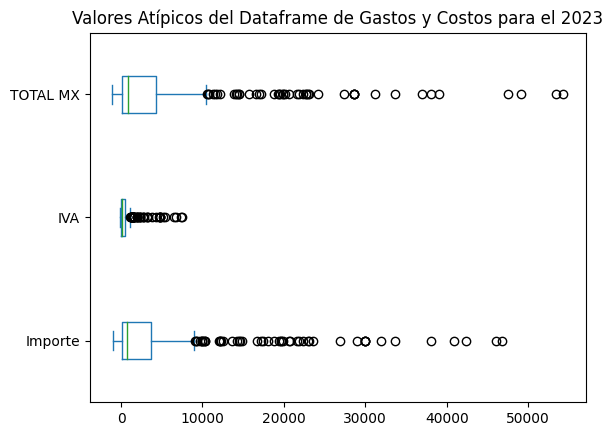

In [240]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_numeric_2023.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe de Gastos y Costos para el 2023")
plt.show() #dibujamos el diagrama

In [241]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df_numeric_2023
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Importe     26557.244156
IVA          3761.774707
TOTAL MX    29218.464899
dtype: float64
Limite inferior permitido Importe    -18708.366775
IVA         -2766.954304
TOTAL MX   -20512.146863
dtype: float64


In [242]:
#Encontramos Ouliers del Dataframe
outliers23= df_numeric_2023[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers23

,Importe,IVA,TOTAL MX
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
392,NaN,NaN,NaN
393,NaN,NaN,NaN
394,NaN,NaN,NaN
395,NaN,NaN,NaN


In [243]:
valores_nulos_O2023=outliers.isnull().sum()
valores_nulos_O2023

IMPORTE     3275
IVA         3283
TOTAL MX    3277
dtype: int64

In [244]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3_23= df_numeric_2023[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3_23

,Importe,IVA,TOTAL MX
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,5551.38,888.22,6439.60
3,5551.98,888.32,6440.30
4,8454.37,1352.70,9807.07
...,...,...,...
392,0.00,0.00,0.00
393,220.00,0.00,220.00
394,18071.52,682.40,18753.92
395,14472.32,0.00,14472.32


In [245]:
#Corroboramos valores nulos del dataframe3
valores_nulos23=data3_23.isnull().sum()
valores_nulos23

Importe     13
IVA         13
TOTAL MX     9
dtype: int64

In [246]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean23=data3_23.copy()
data_clean23=data_clean23.fillna(round(data3_23.mean(),1))
data_clean23

,Importe,IVA,TOTAL MX
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,5551.38,888.22,6439.60
3,5551.98,888.32,6440.30
4,8454.37,1352.70,9807.07
...,...,...,...
392,0.00,0.00,0.00
393,220.00,0.00,220.00
394,18071.52,682.40,18753.92
395,14472.32,0.00,14472.32


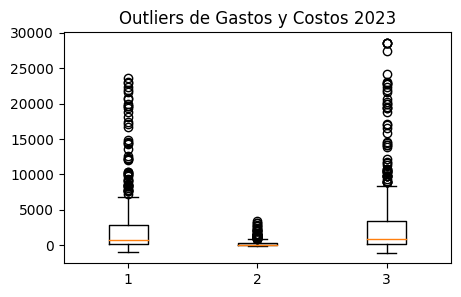

In [247]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean23) 
plt.title("Outliers de Gastos y Costos 2023")
plt.show() #dibujamos el diagrama

In [248]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos23=data_clean23.isnull().sum()
valores_nulos23

Importe     0
IVA         0
TOTAL MX    0
dtype: int64

In [250]:
cuali = gastos_2023[["Fecha", "Folio", "Proveedor", "Descripción", "TIPO GASTO"]]
Datos_limpios_2023_1 = pd.concat([cuali, data_clean23], axis=1)
Datos_limpios_2023_1

,Fecha,Folio,Proveedor,Descripción,TIPO GASTO,Importe,IVA,TOTAL MX
0,2023-01-01,31,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.00
1,2023-01-01,38,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.00
2,2023-01-01,341932,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.38,888.22,6439.60
3,2023-01-01,341933,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.30
4,2023-01-01,342205,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,ARRENDAMIENTO FINANCIERO,8454.37,1352.70,9807.07
...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00
393,2023-02-01,053560,BEBIDAS PURIFICADAS,Epura 20 Lts Policarbonato,ALIMENTOS,220.00,0.00,220.00
394,2023-02-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,18071.52,682.40,18753.92
395,2023-02-01,1453820,EFECTIVALE S. de R.L. de C.V.,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,GASOLINA,14472.32,0.00,14472.32


## **PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [251]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_numeric_2023

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido Importe      9075.43
IVA          1120.00
TOTAL MX    10527.50
dtype: float64
Limite inferior permitido Importe    -5259.05
IVA         -672.00
TOTAL MX   -6100.50
dtype: float64


In [252]:
#Encontramos Outliers del Dataframe
outliers_iqr23= df_numeric_2023[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr23

,Importe,IVA,TOTAL MX
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,1352.7,NaN
...,...,...,...
392,NaN,NaN,NaN
393,NaN,NaN,NaN
394,18071.52,NaN,18753.92
395,14472.32,NaN,14472.32


In [253]:
#Obtenemos datos limpios del Dataframe
data3_iqr23= df_numeric_2023[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr23

,Importe,IVA,TOTAL MX
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,5551.38,888.22,6439.60
3,5551.98,888.32,6440.30
4,8454.37,NaN,9807.07
...,...,...,...
392,0.00,0.00,0.00
393,220.00,0.00,220.00
394,NaN,682.40,NaN
395,NaN,0.00,NaN


In [254]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos23=data3_iqr23.isnull().sum()
valores_nulos23

Importe     50
IVA         49
TOTAL MX    46
dtype: int64

In [255]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr23=data3_iqr23.copy()
data4_iqr23=data4_iqr23.fillna(round(data3_iqr23.mean(),1))
data4_iqr23

,Importe,IVA,TOTAL MX
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,5551.38,888.22,6439.60
3,5551.98,888.32,6440.30
4,8454.37,176.80,9807.07
...,...,...,...
392,0.00,0.00,0.00
393,220.00,0.00,220.00
394,1521.50,682.40,1845.00
395,1521.50,0.00,1845.00


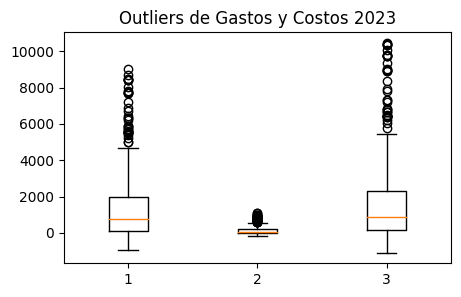

In [256]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data4_iqr23) 
plt.title("Outliers de Gastos y Costos 2023")
plt.show() #dibujamos el diagrama

In [258]:
cuali = gastos_2023[["Fecha", "Folio", "Proveedor", "Descripción", "TIPO GASTO"]]
Datos_limpios_2023_2 = pd.concat([cuali, data4_iqr23], axis=1)
Datos_limpios_2023_2

,Fecha,Folio,Proveedor,Descripción,TIPO GASTO,Importe,IVA,TOTAL MX
0,2023-01-01,31,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.00
1,2023-01-01,38,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.00
2,2023-01-01,341932,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.38,888.22,6439.60
3,2023-01-01,341933,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.30
4,2023-01-01,342205,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,ARRENDAMIENTO FINANCIERO,8454.37,176.80,9807.07
...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00
393,2023-02-01,053560,BEBIDAS PURIFICADAS,Epura 20 Lts Policarbonato,ALIMENTOS,220.00,0.00,220.00
394,2023-02-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,1521.50,682.40,1845.00
395,2023-02-01,1453820,EFECTIVALE S. de R.L. de C.V.,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,GASOLINA,1521.50,0.00,1845.00


In [259]:
Datos_limpios_2020_1.to_csv("Datos_limpios_2020_1.csv")
Datos_limpios_2020_2.to_csv("Datos_limpios_2020_2.csv")
Datos_limpios_2021_1.to_csv("Datos_limpios_2021_1.csv")
Datos_limpios_2021_2.to_csv("Datos_limpios_2021_2.csv")
Datos_limpios_2022_1.to_csv("Datos_limpios_2022_1.csv")
Datos_limpios_2022_2.to_csv("Datos_limpios_2022_2.csv")
Datos_limpios_2023_1.to_csv("Datos_limpios_2023_1.csv")
Datos_limpios_2023_2.to_csv("Datos_limpios_2023_2.csv")

In [260]:
from google.colab import files 
  

files.download("Datos_limpios_2020_1.csv")
files.download("Datos_limpios_2020_2.csv")
files.download("Datos_limpios_2021_1.csv")
files.download("Datos_limpios_2021_2.csv")
files.download("Datos_limpios_2022_1.csv")
files.download("Datos_limpios_2022_2.csv")
files.download("Datos_limpios_2023_1.csv")
files.download("Datos_limpios_2023_2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>